# Natural Language Processing

In this notebook, I downloaded NLTK, which includes inauguration speeches of the presidents in the U.S. By using text data of the speeches, their complexity and the frequency of positive/negative were examined by using Vader.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load inauguration speeches.

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


A wordcloud was generated.

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def wordcloud(title, text):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=10000,height=5000).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

In [5]:
obama_2009 = inaugural.raw('2009-Obama.txt')

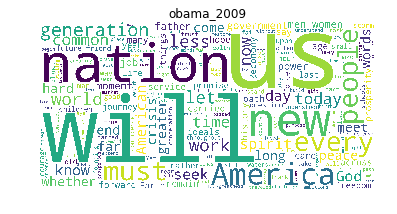

In [6]:
wordcloud("obama_2009", obama_2009)

<h3>Analysis 1: Complexity</h3>
The complexity of speeches was defined as follows. <br/>
<ul>
    <li>Average word length: longer words are more complex</li>
    <li>Average sentence length: longer sentences are more complex</li>
    <li>Vocabulary: the ratio of unique words used to the total number of words</li>
</ul>

In [7]:
from nltk import sent_tokenize,word_tokenize 
def complexity(text):
    num_chars=len(text) # the total characters of sentences
    num_words=len(word_tokenize(text)) # the number of words
    num_sentences=len(sent_tokenize(text)) # the number of sentences
    vocab = {x.lower() for x in word_tokenize(text)} # the number of unique words
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),round(len(vocab)/num_words,2)

In [8]:
(vocab,word_size,sent_size,vocab_to_text) = complexity(obama_2009)

In [9]:
print("{0:s}\t{1:s}\t{2:s}\t{3:s}".format("vocab","word_size","sent_size","vocab_to_text"))
print("{0:>5d}\t{1:>9.2f}\t{2:>9.2f}\t{3:>13.2f}".format(vocab,word_size,sent_size,vocab_to_text))

vocab	word_size	sent_size	vocab_to_text
  896	     4.00	    24.00	         0.33


<h3>Analysis 2: Frequency</h3>

In [10]:
word_freq = {}
for word in word_tokenize(obama_2009):
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

In [11]:
import operator
sorted_word = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)
sorted_word[:20]

[(',', 130),
 ('the', 126),
 ('.', 108),
 ('and', 105),
 ('of', 82),
 ('to', 66),
 ('our', 58),
 ('we', 50),
 ('that', 48),
 ('a', 47),
 ('is', 36),
 ('us', 23),
 ('not', 22),
 ('in', 22),
 ('are', 22),
 (';', 22),
 ('--', 22),
 ('this', 20),
 ('will', 19),
 ('can', 19)]

Stopwords were used often and removed.

In [12]:
from nltk.corpus import stopwords
lowercase_words = [word.lower() for word in word_tokenize(obama_2009) if word not in stopwords.words() and word.isalpha()]

In [13]:
lowercase_words

lowered_word_freq = {}
for word in lowercase_words:
    if word not in lowered_word_freq:
        lowered_word_freq[word] = 1
    else:
        lowered_word_freq[word] += 1

sorted_lowered_word = sorted(lowered_word_freq.items(), key=operator.itemgetter(1), reverse=True)
sorted_lowered_word[:10]

[('us', 23),
 ('nation', 12),
 ('we', 12),
 ('new', 11),
 ('america', 10),
 ('the', 9),
 ('our', 9),
 ('every', 8),
 ('must', 8),
 ('for', 8)]

In [14]:
text_lowercase_words = ""
for word in lowercase_words:
    text_lowercase_words += " " + word

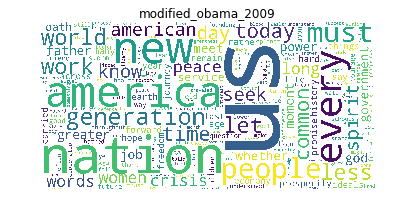

In [15]:
wordcloud("modified_obama_2009", text_lowercase_words)

<h3>Analysis 3: Positive and Negative Words with VADER</h3>
By using Vader, the frequency of positive/negative words were examined.

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
score = {"compound": 0,
        "neg": 0,
        "neu": 0,
        "pos": 0}
analyzer = SentimentIntensityAnalyzer()
sentences = sent_tokenize(obama_2009)
for sentence in sentences:
    vader_score = analyzer.polarity_scores(sentence)
    score["compound"] += vader_score["compound"]/len(sentence)
    score["neg"] += vader_score["neg"]/len(sentence)
    score["neu"] += vader_score["neu"]/len(sentence)
    score["pos"] += vader_score["pos"]/len(sentence)
    
score

{'compound': 0.14092739838655052,
 'neg': 0.12596217516020186,
 'neu': 1.6254497828410952,
 'pos': 0.27475420417796775}

<h3>Lastly, four inauguration speeches by different presidents were analyzed.</h3>

In [18]:
speeches = {"Washington_1789": inaugural.raw("1789-Washington.txt"),
           "Lincoln_1861": inaugural.raw("1861-Lincoln.txt"),
           "Kennedy_1961": inaugural.raw("1961-Kennedy.txt"),
           "Bush_2001": inaugural.raw("2001-Bush.txt")
           }

<h3>Complexity</h3>

In [19]:
print("{0:^13s}\t{1:s}\t{2:s}\t{3:s}\t{4:s}".format("Name","vocab","word_size","sent_size","vocab_to_text"))
for key in speeches.keys():
    (vocab,word_size,sent_size,vocab_to_text) = complexity(speeches[key])
    print("{0:s}\t{1:>5d}\t{2:>9.2f}\t{3:>9.2f}\t{4:>13.2f}".format(key,vocab,word_size,sent_size,vocab_to_text))

    Name     	vocab	word_size	sent_size	vocab_to_text
Washington_1789	  604	     5.00	    66.00	         0.39
Lincoln_1861	 1019	     5.00	    29.00	         0.25
Kennedy_1961	  542	     4.00	    29.00	         0.35
Bush_2001	  591	     4.00	    18.00	         0.33


There is no big difference in word_size for each speech. On the other hand, sentence (sent_size) is becoming shorter.

<h3>Frequency</h3>

In [20]:
for key in speeches.keys():
    speeches[key] = [word.lower() for word in word_tokenize(speeches[key]) if word not in stopwords.words() and word.isalpha()]

In [21]:
for key in speeches.keys():
    print(key)
    word_freq = {}
    for word in speeches[key]:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1
            
    sorted_words = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)
    for i in range(5):
        print(sorted_words[i])
    print()

Washington_1789
('i', 23)
('every', 9)
('government', 8)
('public', 6)
('may', 6)

Lincoln_1861
('i', 44)
('constitution', 24)
('people', 20)
('union', 20)
('states', 19)

Kennedy_1961
('let', 16)
('us', 12)
('world', 8)
('sides', 8)
('new', 7)

Bush_2001
('and', 18)
('we', 14)
('i', 11)
('nation', 11)
('america', 11)



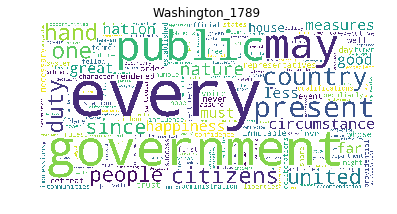

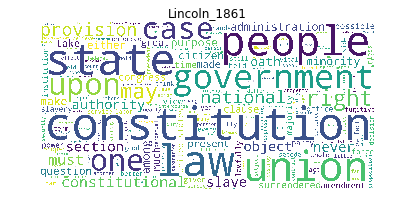

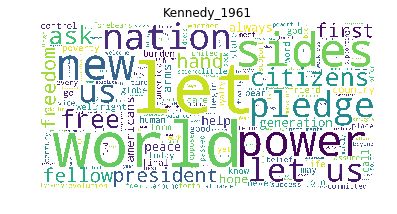

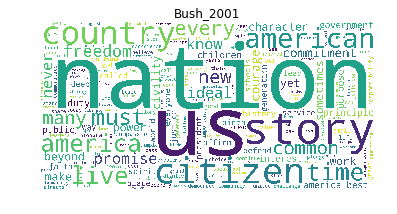

In [22]:
for key in speeches.keys():
    text = ""
    for word in speeches[key]:
        text += " " + word
        
    wordcloud(key, text)
    

Seemingly each president used more words which described the circumstances at their time. For example, Washington, the first president, used "government" 8 times, and Lincoln, who was the president after The Civil War, used "union" 20 times.

<h3>Positive and Negative Words with VADER</h3>

In [23]:
# Load each speeches as text format

speeches = {"Washington_1789": inaugural.raw("1789-Washington.txt"),
           "Lincoln_1861": inaugural.raw("1861-Lincoln.txt"),
           "Kennedy_1961": inaugural.raw("1961-Kennedy.txt"),
           "Bush_2001": inaugural.raw("2001-Bush.txt")
           }
print("{0:16s}\t{1:>10s}\t{2:>10s}\t{3:>10s}\t{4:>10s}".format("name","compound","negative","neutral","positive"))
for key in speeches.keys():
    score = {"compound": 0,
            "neg": 0,
            "neu": 0,
            "pos": 0}
    
    sentences = sent_tokenize(speeches[key])
    for sentence in sentences:
        vader_score = analyzer.polarity_scores(sentence)
        score["compound"] += vader_score["compound"]/len(sentence)
        score["neg"] += vader_score["neg"]/len(sentence)
        score["neu"] += vader_score["neu"]/len(sentence)
        score["pos"] += vader_score["pos"]/len(sentence)

    print("{0:15s}\t\t{1:>8.2f}\t{2:>8.2f}\t{3:>8.2f}\t{4:>8.2f}".format(key,score["compound"],score["neg"],
                                                                         score["neu"],score["pos"]))

name            	  compound	  negative	   neutral	  positive
Washington_1789		    0.04	    0.00	    0.08	    0.01
Lincoln_1861   		    0.03	    0.12	    1.19	    0.14
Kennedy_1961   		    0.06	    0.05	    0.48	    0.06
Bush_2001      		    0.25	    0.09	    1.03	    0.22


According to the results, Lincoln used more negative words than other presidents. Bush used more positive words than other presidents.